In [605]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [606]:
df = pd.read_csv("top10s.csv")
df.head()

,ID,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


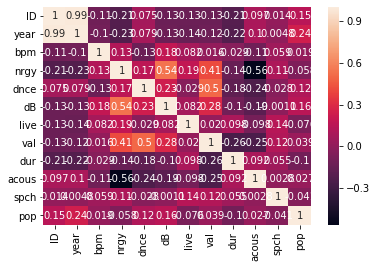

In [607]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [608]:
eachGenre = df.top_genre.unique()
print(eachGenre)

['neo mellow' 'detroit hip hop' 'dance pop' 'pop' 'canadian pop' 'hip pop'
 'barbadian pop' 'atl hip hop' 'australian pop' 'indie pop' 'art pop'
 'colombian pop' 'big room' 'british soul' 'chicago rap' 'acoustic pop'
 'permanent wave' 'boy band' 'baroque pop' 'celtic rock' 'electro'
 'complextro' 'canadian hip hop' 'candy pop' 'alaska indie' 'folk-pop'
 'metropopolis' 'house' 'australian hip hop' 'electropop'
 'australian dance' 'hollywood' 'canadian contemporary r&b'
 'irish singer-songwriter' 'tropical house' 'belgian edm'
 'french indie pop' 'hip hop' 'danish pop' 'latin' 'canadian latin'
 'electronic trap' 'edm' 'electro house' 'downtempo' 'brostep'
 'contemporary country' 'moroccan pop' 'escape room' 'alternative r&b']


In [609]:
df.describe()

,ID,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [610]:
df.columns.values

array(['ID', 'title', 'artist', 'top_genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype=object)

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
ID           603 non-null int64
title        603 non-null object
artist       603 non-null object
top_genre    603 non-null object
year         603 non-null int64
bpm          603 non-null int64
nrgy         603 non-null int64
dnce         603 non-null int64
dB           603 non-null int64
live         603 non-null int64
val          603 non-null int64
dur          603 non-null int64
acous        603 non-null int64
spch         603 non-null int64
pop          603 non-null int64
dtypes: int64(12), object(3)
memory usage: 70.7+ KB


In [612]:
df.isna().head()

,ID,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [613]:
df.isna().sum()

ID           0
title        0
artist       0
top_genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
ID           603 non-null int64
title        603 non-null object
artist       603 non-null object
top_genre    603 non-null object
year         603 non-null int64
bpm          603 non-null int64
nrgy         603 non-null int64
dnce         603 non-null int64
dB           603 non-null int64
live         603 non-null int64
val          603 non-null int64
dur          603 non-null int64
acous        603 non-null int64
spch         603 non-null int64
pop          603 non-null int64
dtypes: int64(12), object(3)
memory usage: 70.7+ KB


In [615]:
encode = LabelEncoder()
encode.fit(df['top_genre'])
df['top_genre'] = encode.transform(df['top_genre'])

In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
ID           603 non-null int64
title        603 non-null object
artist       603 non-null object
top_genre    603 non-null int32
year         603 non-null int64
bpm          603 non-null int64
nrgy         603 non-null int64
dnce         603 non-null int64
dB           603 non-null int64
live         603 non-null int64
val          603 non-null int64
dur          603 non-null int64
acous        603 non-null int64
spch         603 non-null int64
pop          603 non-null int64
dtypes: int32(1), int64(12), object(2)
memory usage: 68.4+ KB


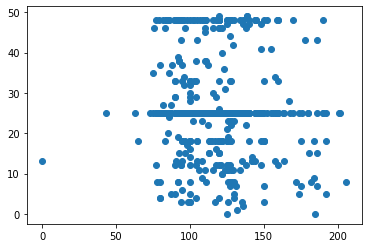

In [617]:
plt.scatter(df["bpm"],df["top_genre"])

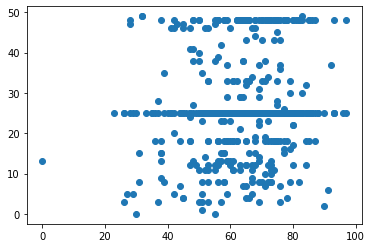

In [618]:
plt.scatter(df["dnce"],df["top_genre"])

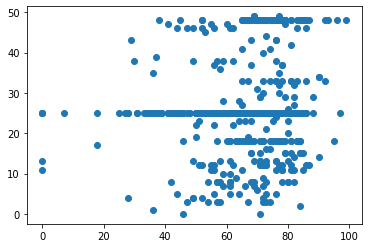

In [619]:
plt.scatter(df["pop"],df["top_genre"])

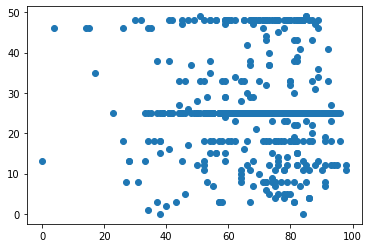

In [620]:
plt.scatter(df["nrgy"],df["top_genre"])

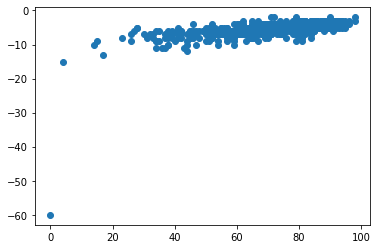

In [621]:
plt.scatter(df["nrgy"],df["dB"])

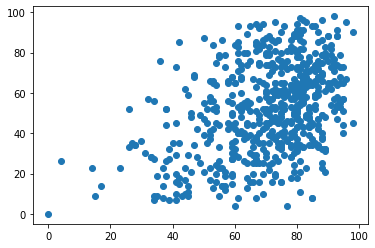

In [622]:
#Here, "val" means "valence": the greater the "val", 
#the higher the positive mood for the songs.

plt.scatter(df["nrgy"],df["val"])

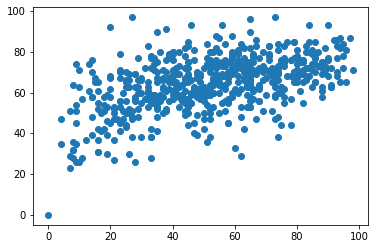

In [623]:
#Here, "dnce" means "dance".

plt.scatter(df["val"],df["dnce"])

In [624]:
####KMEANS CLUSTERING OF GENRE BASED ON ENERGY####

clustering = KMeans(n_clusters=4)
clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [625]:
estimate = clustering.fit_predict(df[["nrgy","top_genre"]])
estimate

array([3, 0, 0, 0, 3, 0, 0, 0, 1, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 2, 3, 2, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 2, 3, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 3, 3, 3, 0, 1,
       2, 2, 2, 3, 0, 2, 2, 3, 3, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 3, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 3, 2, 0, 3, 2,
       0, 0, 0, 3, 1, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 0, 0, 2, 2, 0, 0,
       3, 3, 2, 0, 0, 0, 2, 2, 0, 0, 1, 3, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 3, 3, 2, 0, 3, 3,
       2, 0, 3, 2, 3, 3, 2, 3, 0, 0, 2, 2, 3, 1, 3, 2, 0, 2, 0, 2, 0, 1,
       2, 0, 0, 2, 3, 0, 0, 1, 3, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1,
       3, 2, 0, 0, 1, 3, 2, 1, 2, 3, 3, 0, 1, 2, 1, 2, 0, 2, 2, 3, 2, 0,
       0, 2, 3, 0, 0, 2, 3, 0, 2, 1, 0, 2, 0, 0, 0,

In [626]:
df['output'] = estimate


No handles with labels found to put in legend.


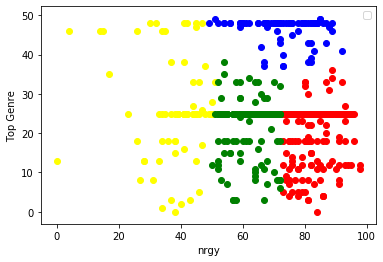

In [627]:
train1 = df[df.output==0]
train2 = df[df.output==1]
train3 = df[df.output==2]
train4 = df[df.output==3]


plt.scatter(train1.nrgy,train1["top_genre"],color="red")
plt.scatter(train2.nrgy,train2["top_genre"],color="yellow")
plt.scatter(train3.nrgy,train3["top_genre"],color="green")
plt.scatter(train4.nrgy,train4["top_genre"],color="blue")


plt.xlabel("nrgy")
plt.ylabel("Top Genre")
plt.legend()


In [628]:
x = np.array(df[["nrgy"]])
y = np.array(df[["top_genre"]])

scale = MinMaxScaler()
scale.fit(y)
df["top_genre"] = scale.transform(df[["top_genre"]])
scale.fit(x)
df["nrgy"] = scale.transform(df[["nrgy"]])
clustering = KMeans(n_clusters=4)
expect = clustering.fit_predict(df[["nrgy","top_genre"]])
print(expect)

[3 1 1 1 3 1 1 1 2 0 1 3 1 1 1 0 2 1 1 2 2 0 1 3 1 3 1 1 1 1 1 1 1 2 3 2 2
 0 1 0 1 2 0 1 2 1 1 0 0 1 0 2 2 1 3 0 1 3 1 3 1 1 1 1 3 2 1 1 0 1 2 1 0 1
 2 1 1 1 1 2 1 1 1 1 1 0 1 2 1 1 1 0 0 1 2 0 0 1 2 1 1 1 1 1 1 3 3 3 0 3 2
 1 0 3 1 2 1 3 3 0 1 1 0 2 1 0 0 1 1 1 1 1 0 0 1 0 1 3 1 1 0 0 2 1 1 2 0 1
 2 3 2 1 3 1 1 0 1 3 2 0 0 1 1 1 0 1 1 3 1 2 1 1 2 2 1 1 3 3 2 1 0 1 2 2 1
 1 2 3 1 1 1 0 3 1 1 1 1 1 0 1 1 1 2 1 1 0 1 0 1 0 3 3 1 1 3 3 2 0 3 3 2 1
 3 0 3 3 1 3 1 0 0 2 3 2 3 2 1 2 1 2 1 2 1 1 1 1 3 1 1 3 3 1 0 1 1 3 2 2 1
 1 3 3 2 2 3 3 1 1 3 3 2 2 2 3 3 1 2 2 2 2 1 1 1 3 0 1 1 1 3 1 1 1 3 0 2 2
 1 1 1 1 1 1 3 1 1 2 0 1 1 1 3 2 1 1 2 0 1 1 1 1 1 1 3 1 1 1 1 0 1 2 2 1 0
 0 0 0 1 1 1 2 0 2 0 2 1 3 1 2 1 0 1 3 0 1 1 1 1 1 1 2 1 2 2 2 2 1 1 0 1 1
 2 2 2 1 2 0 2 0 1 3 1 2 2 1 1 1 0 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 3 0 1 1
 3 2 1 1 2 1 0 1 1 1 2 1 1 0 1 0 2 2 1 3 1 1 1 1 3 1 1 2 1 2 1 1 1 3 2 2 3
 2 0 1 3 1 0 2 1 2 2 1 2 1 2 1 1 2 3 0 0 2 2 1 1 1 1 3 0 0 2 2 2 2 3 1 1 1
 3 2 1 1 1 0 1 1 2 1 1 0 

In [629]:
df["output"] = expect

In [630]:
clustering.cluster_centers_

array([[0.74781341, 0.17832847],
       [0.81643394, 0.50447547],
       [0.528207  , 0.49387755],
       [0.68475901, 0.94572297]])

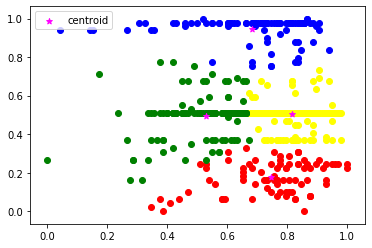

In [631]:
train1 = df[df.output==0]
train2 = df[df.output==1]
train3 = df[df.output==2]
train4 = df[df.output==3]


plt.scatter(train1.nrgy,train1["top_genre"],color="red")
plt.scatter(train2.nrgy,train2["top_genre"],color="yellow")
plt.scatter(train3.nrgy,train3["top_genre"],color="green")
plt.scatter(train4.nrgy,train4["top_genre"],color="blue")

plt.scatter(clustering.cluster_centers_[:,0],clustering.cluster_centers_[:,1],color="fuchsia",marker="*",label="centroid")

plt.legend()

In [632]:
#Elbow plot construction

range_create = range(1,15)
sumOfSquareError = []

for each_cluster in range_create:
    clustering2 = KMeans(n_clusters=each_cluster)
    clustering2.fit(df[["nrgy","top_genre"]])
    
    #Renders the sum of square error
    sumOfSquareError.append(clustering2.inertia_)

sumOfSquareError

[47.03950123048509,
 26.705826069867783,
 18.07028989087534,
 12.068244713498899,
 9.709535457853576,
 7.48532520144901,
 6.198053304822425,
 5.575655768835361,
 5.05464071893353,
 4.453784547452618,
 3.9604426933856915,
 3.557193572018765,
 3.310966650716449,
 2.918023208868652]

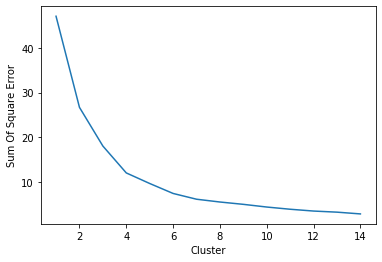

In [633]:
plt.xlabel("Cluster")
plt.ylabel("Sum Of Square Error")
plt.plot(range_create,sumOfSquareError)

In [634]:
####KMEANS CLUSTERING OF VALENCE BASED ON ENERGY####

clustering = KMeans(n_clusters=2)
clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [635]:
estimate = clustering.fit_predict(df[["nrgy","val"]])
estimate

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [644]:
df['output'] = estimate
df

,ID,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,output
0,1,"Hey, Soul Sister",Train,0.938776,2010,97,0.908163,67,-4,8,0.816327,217,19,4,83,1
1,2,Love The Way You Lie,Eminem,0.551020,2010,87,0.948980,75,-5,52,0.653061,263,24,23,82,1
2,3,TiK ToK,Kesha,0.510204,2010,120,0.857143,76,-3,29,0.724490,200,10,14,80,1
3,4,Bad Romance,Lady Gaga,0.510204,2010,119,0.938776,70,-4,8,0.724490,295,0,4,79,1
4,5,Just the Way You Are,Bruno Mars,0.979592,2010,109,0.857143,64,-5,9,0.438776,221,2,4,78,0
5,6,Baby,Justin Bieber,0.367347,2010,65,0.877551,73,-5,11,0.551020,214,4,14,77,1
6,7,Dynamite,Taio Cruz,0.510204,2010,120,0.795918,75,-4,4,0.836735,203,0,9,77,1
7,8,Secrets,OneRepublic,0.510204,2010,148,0.775510,52,-6,12,0.387755,225,7,4,77,0
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,0.775510,2010,93,0.377551,48,-8,12,0.142857,216,74,3,76,0
9,10,Only Girl (In The World),Rihanna,0.163265,2010,126,0.734694,79,-4,7,0.622449,235,13,4,73,1


No handles with labels found to put in legend.


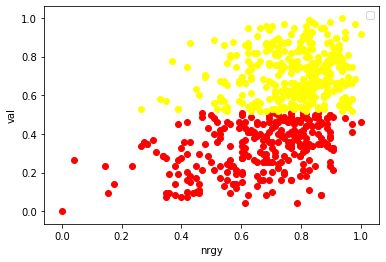

In [645]:
train1 = df[df.output==0]
train2 = df[df.output==1]


plt.scatter(train1.nrgy,train1["val"],color="red")
plt.scatter(train2.nrgy,train2["val"],color="yellow")


plt.xlabel("nrgy")
plt.ylabel("val")
plt.legend()


In [646]:
x = np.array(df[["nrgy"]])
y = np.array(df[["val"]])

scale = MinMaxScaler()
scale.fit(y)
df["val"] = scale.transform(df[["val"]])
scale.fit(x)
df["nrgy"] = scale.transform(df[["nrgy"]])


clustering = KMeans(n_clusters=2)
expect = clustering.fit_predict(df[["nrgy","val"]])
print(expect)

[1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1
 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1
 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0
 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1
 1 0 1 1 1 0 1 1 1 0 1 0 

In [647]:
df["output"] = expect

In [648]:
clustering.cluster_centers_

array([[0.63345196, 0.33390224],
       [0.79446064, 0.70658512]])

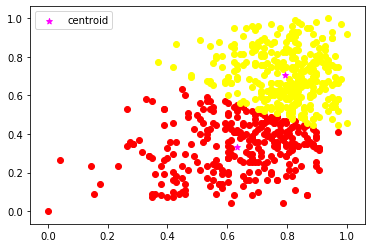

In [649]:
train1 = df[df.output==0]
train2 = df[df.output==1]



plt.scatter(train1.nrgy,train1["val"],color="red")
plt.scatter(train2.nrgy,train2["val"],color="yellow")

plt.scatter(clustering.cluster_centers_[:,0],clustering.cluster_centers_[:,1],color="fuchsia",marker="*",label="centroid")

plt.legend()

In [650]:
#Elbow plot construction

range_create = range(1,8)
sumOfSquareError = []

for each_cluster in range_create:
    clustering2 = KMeans(n_clusters=each_cluster)
    clustering2.fit(df[["nrgy","val"]])
    
    #Renders the sum of square error
    sumOfSquareError.append(clustering2.inertia_)

sumOfSquareError

[48.44544630726696,
 23.714251657472992,
 16.370913596436722,
 13.001120895737623,
 9.897471365946673,
 8.370868342322588,
 7.111325110900282]

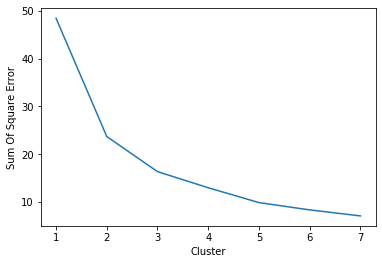

In [651]:
plt.xlabel("Cluster")
plt.ylabel("Sum Of Square Error")
plt.plot(range_create,sumOfSquareError)